# Project Part 1

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [2]:
nData = pd.read_csv("Normal.csv")
hData = pd.read_csv("Type_H.csv")
sData = pd.read_csv("Type_S.csv")

In [3]:
print("nData ",nData.shape)
print("hData ",hData.shape)
print("sData ",sData.shape)

nData  (100, 7)
hData  (60, 7)
sData  (150, 7)


In [4]:
print(" Column names in nData : ",nData.columns)
print(" Column names in hData : ",hData.columns)
print(" Column names in sData : ",sData.columns)

 Column names in nData :  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
 Column names in hData :  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
 Column names in sData :  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


*All three Data Frames has the same column names

In [5]:
print("Datatype For all columns in nData : ",nData.dtypes)
print("Datatype For all columns in hData : ",hData.dtypes)
print("Datatype For all columns in sData : ",sData.dtypes)

Datatype For all columns in nData :  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Datatype For all columns in hData :  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Datatype For all columns in sData :  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [6]:
print("There is {0} variation in Class feature of nData : {1} ".format(nData.Class.nunique(),nData.Class.unique()))
print("There is {0} variation in Class feature of hData : {1} ".format(hData.Class.nunique(),hData.Class.unique()))
print("There is {0} variation in Class feature of sData : {1} ".format(sData.Class.nunique(),sData.Class.unique()))

There is 2 variation in Class feature of nData : ['Normal' 'Nrmal'] 
There is 2 variation in Class feature of hData : ['Type_H' 'type_h'] 
There is 2 variation in Class feature of sData : ['Type_S' 'tp_s'] 


In [7]:
nData["Class"].replace(["Nrmal","Normal"],"normal",inplace=True)
hData["Class"].replace("Type_H","type_h",inplace=True)
sData["Class"].replace(["tp_s","Type_S"],"type_s",inplace=True) 

In [8]:
nhsData=nData.append(hData).append(sData)
nhsData

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [9]:
nhsData.shape

(310, 7)

In [10]:
nhsData.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
28,44.551012,21.931147,26.785916,22.619865,111.072920,2.652321,type_h
83,48.902904,5.587589,55.500000,43.315316,137.108289,19.854759,normal
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,type_h
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,type_h
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,type_s


In [11]:
print("Feature-wise percentage of Null values : \n {0}".format(nhsData.isnull().sum() * 100 / len(nhsData)))

Feature-wise percentage of Null values : 
 P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [12]:
nhsData.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


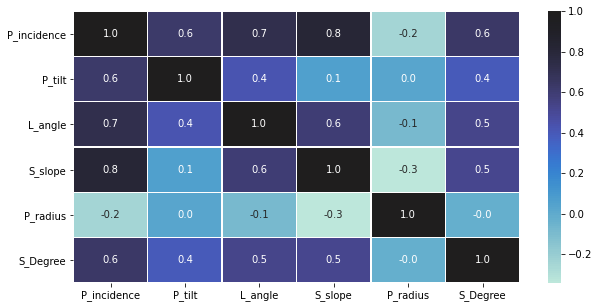

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(nhsData.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

* P_incidence and S_slope Features having stronger correlation with 0.8 correlation value.
* P_incidence and P_radius Features having weaker correlation with -0.2 correlation value.

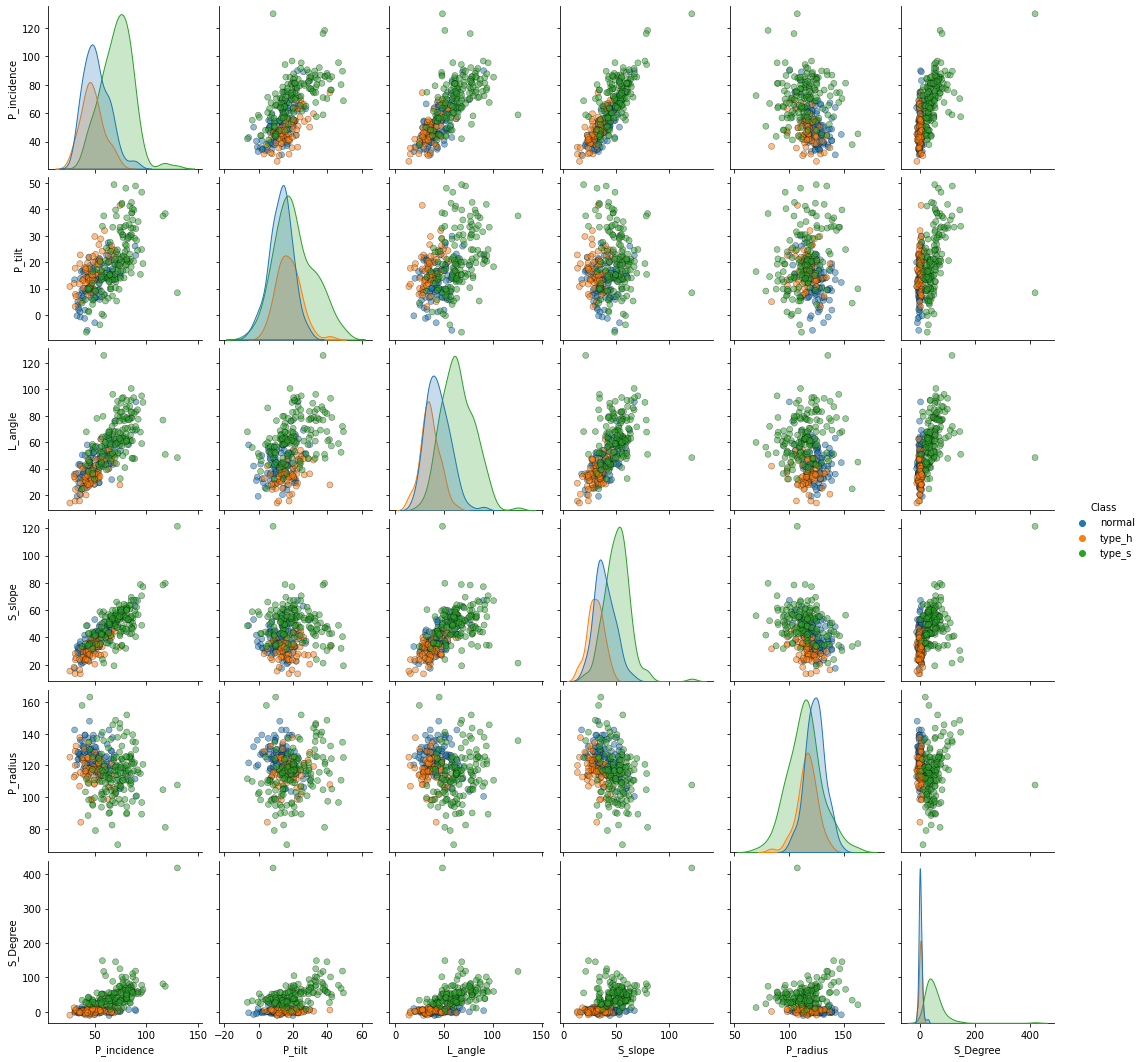

In [14]:
sns.pairplot(nhsData, hue = 'Class',plot_kws={'alpha':0.5, 'edgecolor': 'k'})

* Above pairplot show the type_s Class is higher at P_incidence,L_angle and S_slope
* The normal Class is higher at p_tilt and S_Degree
* There is positive relationship between P_incidence and S_slope features
* The features P_radius and P_tilt both are normally distributed 
* The feature S_Degree is heavily right-skewed

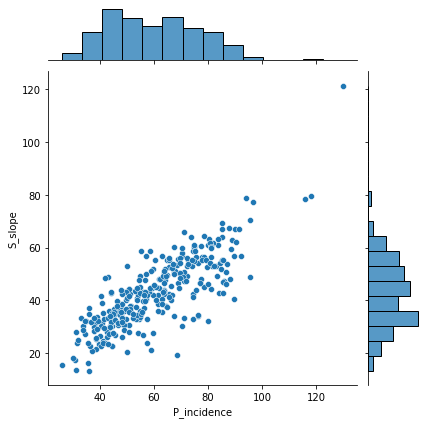

In [15]:
sns.jointplot(x = "P_incidence", y = "S_slope",
              kind = "scatter", data = nhsData)
plt.show()

* Above jointplot shows the positive relationship between P_incidence and S_slope features
* Increase in P_incidence also increase in S_slope
* There is some outlier

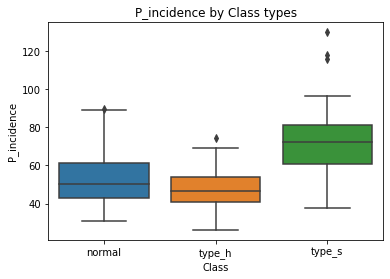

In [16]:
sns.boxplot(x="Class", y="P_incidence", data=nhsData)
plt.title('P_incidence by Class types')
plt.show()

* Above boxplots shows almost dissimilar shapes and spreads
* There is some outlier above uppar fance in all three Class
* The boxplots show almost dissimilar shapes, location and spreads

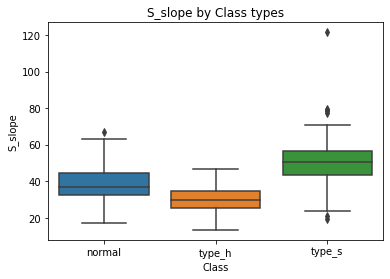

In [17]:
sns.boxplot(x="Class", y="S_slope", data=nhsData)
plt.title('S_slope by Class types')
plt.show()

* The boxplots show almost dissimilar shapes and spreads
* There is some outlier above uppar fance in normal Class and type_s Class  
* There is some outlier below lower fance in type_s Class  

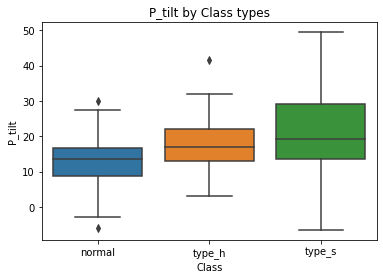

In [18]:
sns.boxplot(x="Class", y="P_tilt", data=nhsData)
plt.title('P_tilt by Class types')
plt.show()

* Above boxplots show almost dissimilar shapes and spreads
* There is some outlier above uppar fance in normal Class and type_h Class
* There is some outlier below lower fance in normal Class

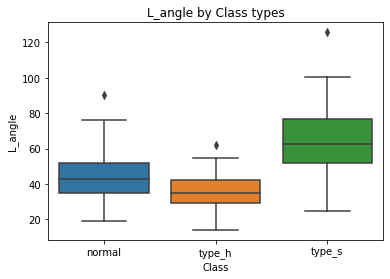

In [19]:
sns.boxplot(x="Class", y="L_angle", data=nhsData)
plt.title('L_angle by Class types')
plt.show()

* Above boxplots show almost dissimilar shapes and spreads
* There is some outlier above uppar fance in all three Class

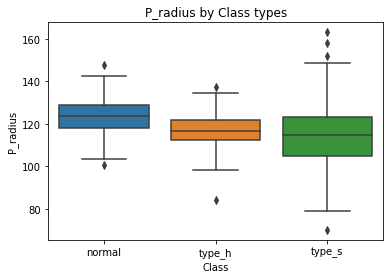

In [20]:
sns.boxplot(x="Class", y="P_radius", data=nhsData)
plt.title('P_radius by Class types')
plt.show()

* Above boxplots show almost dissimilar shapes and spreads
* There is some outlier above uppar fance in all three Class
* There is some outlier below lower fance in all three Class

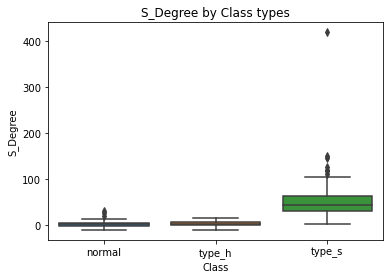

In [21]:
sns.boxplot(x="Class", y="S_Degree", data=nhsData)
plt.title('S_Degree by Class types')
plt.show()

* Above boxplots show almost dissimilar shapes and spreads
* There is some outlier above uppar fance in normal Class and type_s Class
* There is skewness in normal Class and type_h Class

In [22]:
X = nhsData.drop(labels= "Class" , axis = 1)
Y = nhsData["Class"]
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [23]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [25]:
Xtrain_predict = knn.predict(X_train)
Xtest_predict = knn.predict(X_test)

In [26]:
print("Model Accuracy on Train data: {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict)))
print("Model precision on Train data: {0:.2f}".format(precision_score(Y_train, Xtrain_predict,average='macro')))

Model Accuracy on Train data: 0.87
Model precision on Train data: 0.85


In [27]:
print("Classification Report for Traing Dataset")
print(classification_report(Y_train, Xtrain_predict, labels=["normal","type_h","type_s"]))

Classification Report for Traing Dataset
              precision    recall  f1-score   support

      normal       0.77      0.85      0.81        81
      type_h       0.80      0.67      0.73        49
      type_s       0.97      0.96      0.96       118

    accuracy                           0.87       248
   macro avg       0.85      0.83      0.83       248
weighted avg       0.87      0.87      0.87       248



In [28]:
print("Model Accuracy on test data: {0:.2f}".format(accuracy_score(Y_test, Xtest_predict)))
print("Model precision on test data: {0:.2f}".format(precision_score(Y_test, Xtest_predict,average='macro')))

Model Accuracy on test data: 0.82
Model precision on test data: 0.75


In [29]:
print("Classification Report for Test Dataset")
print(classification_report(Y_test, Xtest_predict, labels=["normal","type_h","type_s"]))

Classification Report for Test Dataset
              precision    recall  f1-score   support

      normal       0.67      0.84      0.74        19
      type_h       0.57      0.36      0.44        11
      type_s       1.00      0.97      0.98        32

    accuracy                           0.82        62
   macro avg       0.75      0.72      0.72        62
weighted avg       0.82      0.82      0.81        62



In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Tuning the hyperparameters

leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2,3,4,5,6,7,8,9,10]
w= ['uniform','distance']

In [32]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,weights=w)
knn_2 = KNeighborsClassifier()

In [33]:
clf = GridSearchCV(knn_2, hyperparameters, cv=2)
best_model = clf.fit(X_train, Y_train)

In [34]:
print('Best parameters:', best_model.best_estimator_.get_params())

Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 8, 'weights': 'distance'}


In [35]:
knn3 = KNeighborsClassifier(n_neighbors=12,p=8,weights='distance')
knn3.fit(X_train, Y_train)
Xtrain_predict3 = knn3.predict(X_train)
Xtest_predict3 = knn3.predict(X_test)

In [36]:
print("Model Accuracy after tuning hyperparameters : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict3)))
print("Model precision after tuning hyperparameters: {0:.2f}".format(precision_score(Y_train, Xtrain_predict3,average='macro')))

Model Accuracy after tuning hyperparameters : 1.00
Model precision after tuning hyperparameters: 1.00


In [37]:
print("Classification Report after tuning hyperparametersClassification Report for Train Dataset")
print(classification_report(Y_train, Xtrain_predict3, labels=["normal","type_h","type_s"]))

Classification Report after tuning hyperparametersClassification Report for Train Dataset
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        81
      type_h       1.00      1.00      1.00        49
      type_s       1.00      1.00      1.00       118

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [38]:
print("Model Accuracy after tuning hyperparameters : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict3)))
print("Model precision after tuning hyperparameters: {0:.2f}".format(precision_score(Y_test, Xtest_predict3,average='macro')))

Model Accuracy after tuning hyperparameters : 0.87
Model precision after tuning hyperparameters: 0.83


In [39]:

print("Classification Report after tuning hyperparametersClassification Report for Test Dataset")
print(classification_report(Y_test, Xtest_predict3, labels=["normal","type_h","type_s"]))

Classification Report after tuning hyperparametersClassification Report for Test Dataset
              precision    recall  f1-score   support

      normal       0.77      0.89      0.83        19
      type_h       0.75      0.55      0.63        11
      type_s       0.97      0.97      0.97        32

    accuracy                           0.87        62
   macro avg       0.83      0.80      0.81        62
weighted avg       0.87      0.87      0.87        62



 After tuning hyperparameters :-
*  The accuracy For Train data : +13% improvement
*  The precision: For Train data : +15% improvement
*  The accuracy Test data : +5% improvement
*  The precision Test data : +8% improvement
* 'n_neighbors' and 'p' parameters contributed most to improve model performance
* The probable reason as we increase n_neighbors, the flexibility of the classifier gets reduced and the decision boundary gets closer and closer to linear. These models produce low variance but high bias
* The increasing the number of 'n_neighbors' improves the test scores

# Project Part 2

In [40]:
df1 = pd.read_csv("Data1.csv")
df2 = pd.read_csv("Data2.csv")

In [41]:
print(df1.shape)
print(df2.shape)

(5000, 8)
(5000, 7)


In [42]:
df = pd.merge(df1, df2, on="ID")
df.shape

(5000, 14)

In [43]:
df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [44]:
df["CreditCard"] = df["CreditCard"].astype(int).astype(object)
df["InternetBanking"] = df["InternetBanking"].astype(int).astype(object)
df["FixedDepositAccount"] = df["FixedDepositAccount"].astype(int).astype(object)
df["Security"] = df["Security"].astype(int).astype(object)
df["Level"] = df["Level"].astype(int).astype(object)
df["HiddenScore"] = df["HiddenScore"].astype(int).astype(object)

<AxesSubplot:>

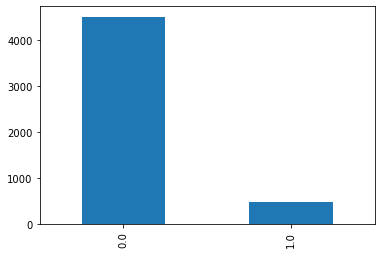

In [45]:
pd.value_counts(df["LoanOnCard"]).plot(kind="bar")

 * There is more then 4000 customer who don't have loan on credit card
 * There is less then 1000 customer wh have loan on credit card

In [46]:
print("Percentage of Null values : \n {0}".format(df.isnull().sum() * 100 / len(df)))

Percentage of Null values : 
 ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [47]:
df['HiddenScore'].isnull().sum()

0

In [48]:
df['LoanOnCard']=df['LoanOnCard'].fillna(0)

In [49]:
print(df['HiddenScore'].value_counts())
print(df['Level'].value_counts())
print(df['Security'].value_counts())
print(df['FixedDepositAccount'].value_counts())
print(df['InternetBanking'].value_counts())
print(df['CreditCard'].value_counts())
print(df['LoanOnCard'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: HiddenScore, dtype: int64
1    2096
3    1501
2    1403
Name: Level, dtype: int64
0    4478
1     522
Name: Security, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


In [50]:
df['LoanOnCard']=df['LoanOnCard'].astype(int)

In [51]:
Xdf = df.drop(['ID','ZipCode','LoanOnCard'] , axis = 1)
ydf = df["LoanOnCard"]
Xdf.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [52]:
Xdf_train, Xdf_test, ydf_train, ydf_test = train_test_split(Xdf, ydf, test_size=0.25, random_state=7)

In [53]:
yes = df[df["LoanOnCard"]==1]
no = df[df["LoanOnCard"]==0]
print(yes.shape,no.shape)

(480, 14) (4520, 14)


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
# Fit the model on train
basemodel = LogisticRegression(solver="liblinear")
basemodel.fit(Xdf_train, ydf_train)
#predict on test
y_predict = basemodel.predict(Xdf_test)

In [56]:
print("The LogisticRegression model accuracy score {0:.2f}".format(accuracy_score(ydf_test,y_predict)))
print("The LogisticRegression model recall score {0:.2f}".format(recall_score(ydf_test, y_predict)))
print("The LogisticRegression model precision score {0:.2f}".format(precision_score(ydf_test, y_predict)))

print(classification_report(ydf_test,y_predict,labels=[1, 0]))

The LogisticRegression model accuracy score 0.96
The LogisticRegression model recall score 0.66
The LogisticRegression model precision score 0.85
              precision    recall  f1-score   support

           1       0.85      0.66      0.75       124
           0       0.96      0.99      0.98      1126

    accuracy                           0.96      1250
   macro avg       0.91      0.82      0.86      1250
weighted avg       0.95      0.96      0.95      1250



In [57]:
print(confusion_matrix(ydf_test,y_predict))

[[1112   14]
 [  42   82]]


Confusion Matrix


<AxesSubplot:>

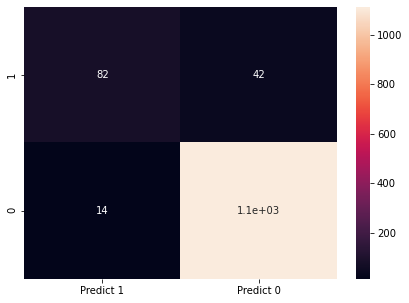

In [58]:
print("Confusion Matrix")
cm=confusion_matrix(ydf_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that customers have LoanOnCard 82

True Negatives (TN): we correctly predicted that customers don't have LoanOnCard 1112

False Positives (FP): we incorrectly predicted that customers have LoanOnCard (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that customer don't have LoanOnCard (a "Type II error") 42 Falsely predict negative Type II error

### Balancing data

In [59]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [60]:
os=RandomOverSampler() 
X_train_oft,y_train_oft=os.fit_resample(Xdf_train,ydf_train)
print("The number of data before fit {}".format(Counter(ydf_train)))
print("The number of data after fit {}".format(Counter(y_train_oft)))

The number of data before fit Counter({0: 3394, 1: 356})
The number of data after fit Counter({0: 3394, 1: 3394})


In [61]:
basemodel.fit(X_train_oft, y_train_oft)
#predict on test
y_pred_oft = basemodel.predict(Xdf_test)

In [62]:
print("The LogisticRegression model accuracy score after balancing data {0:.2f}".format(accuracy_score(ydf_test,y_pred_oft)))
print("The LogisticRegression model recall score after balancing data {0:.2f}".format(recall_score(ydf_test, y_pred_oft)))
print("The LogisticRegression model precision score after balancing data {0:.2f}".format(precision_score(ydf_test, y_predict)))

The LogisticRegression model accuracy score after balancing data 0.88
The LogisticRegression model recall score after balancing data 0.92
The LogisticRegression model precision score after balancing data 0.85


In [63]:
print(confusion_matrix(ydf_test,y_pred_oft))

[[986 140]
 [ 10 114]]


Confusion Matrix


<AxesSubplot:>

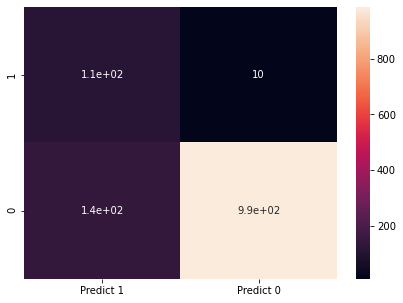

In [64]:
print("Confusion Matrix")
cm=confusion_matrix(ydf_test, y_pred_oft, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

After Balancing data : 
* The accuracy decresed by 8%
* The recall incresed by 25%
* The precision is constan 85%

The confusion matrix after balancing data :

True Positives (TP): we correctly predicted that customers have LoanOnCard 113 
and before balancing data we have 82  correctly predicted that customers have LoanOnCard

True Negatives (TN): we correctly predicted that customers don't have LoanOnCard 997 
and before balancing data we have 1112 correctly predicted that customers don't have LoanOnCard

False Positives (FP): we incorrectly predicted that customers have LoanOnCard (a "Type I error") 129 Falsely predict positive  Type I error 
and before balancing data 14 Falsely predict positive  Type I error

False Negatives (FN): we incorrectly predicted that customer don't have LoanOnCard (a "Type II error") 11 Falsely predict negative Type II error and before balancing data 42 Falsely predict negative Type II error

### SVM

In [65]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [66]:

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(Xdf_train, ydf_train)

svc_prediction = svc_model.predict(Xdf_test)

In [67]:
# check the accuracy on the training set
print("The SVM model accuracy score {0:.2f}".format(accuracy_score(ydf_test, svc_prediction)))
print("The SVM model recall score {0:.2f}".format(recall_score(ydf_test, svc_prediction)))
print("The SVM model precision score{0:.2f}".format(precision_score(ydf_test, svc_prediction)))

The SVM model accuracy score 0.96
The SVM model recall score 0.61
The SVM model precision score0.90


In [68]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(Xdf_train, ydf_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [69]:

# print best parameter after tuning
print(grid.best_params_)
   
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [70]:
grid_predictions = grid.predict(Xdf_test)

In [71]:
# evaluate accuracy
print("The SVM model accuracy score after tuning parameters {0:.2f}".format(accuracy_score(ydf_test, grid_predictions)))
print("The SVM model recall score after tuning parameters {0:.2f}".format(recall_score(ydf_test, grid_predictions)))
print("The SVM model precision score after tuning parameters {0:.2f}".format(precision_score(ydf_test, grid_predictions)))

The SVM model accuracy score after tuning parameters 0.97
The SVM model recall score after tuning parameters 0.80
The SVM model precision score after tuning parameters 0.89


### KNN

In [72]:
knnclf = KNeighborsClassifier(n_neighbors= 5)

In [73]:
knnclf.fit(Xdf_train, ydf_train)

KNeighborsClassifier()

In [74]:
Xtest_predict_knn = knnclf.predict(Xdf_test)
# evaluate accuracy
print("The KNN model accuracy score {0:.2f}".format(accuracy_score(ydf_test, Xtest_predict_knn)))
print("The KNN model recall score {0:.2f}".format(recall_score(ydf_test, Xtest_predict_knn)))

The KNN model accuracy score 0.91
The KNN model recall score 0.35


## Finalizing model

In [75]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 1000, kernel='rbf', gamma= 0.0001)
svc_model.fit(Xdf_train, ydf_train)
svc_prediction_final = svc_model.predict(Xdf_test)

In [76]:
# evaluate accuracy
print("The final model accuracy score{0:.2f}".format(accuracy_score(ydf_test, svc_prediction_final)))
print("The final model recall score {0:.2f}".format(recall_score(ydf_test, svc_prediction_final)))
print("The final model precision score {0:.2f}".format(precision_score(ydf_test, svc_prediction_final)))
print();
print(classification_report(ydf_test,svc_prediction_final,labels=[1, 0]))

The final model accuracy score0.97
The final model recall score 0.80
The final model precision score 0.89

              precision    recall  f1-score   support

           1       0.89      0.80      0.84       124
           0       0.98      0.99      0.98      1126

    accuracy                           0.97      1250
   macro avg       0.93      0.89      0.91      1250
weighted avg       0.97      0.97      0.97      1250



In [77]:
print(confusion_matrix(ydf_test,svc_prediction_final))

[[1114   12]
 [  25   99]]


Confusion Matrix


<AxesSubplot:>

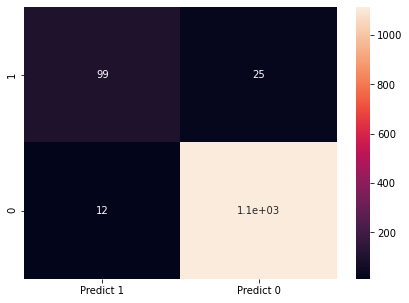

In [78]:
print("Confusion Matrix")
cm=confusion_matrix(ydf_test, svc_prediction_final, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Final model diffrance from base model : 
* The accuracy incresed by 1%
* The recall incresed by 14%
* The precision incresed by 4%

The confusion matrix diffrance in Final model compare to base mode :

True Positives (TP): we correctly predicted that customers have LoanOnCard 99 
and before balancing data we have 82  correctly predicted that customers have LoanOnCard

True Negatives (TN): we correctly predicted that customers don't have LoanOnCard 1114 
and before balancing data we have 1112 correctly predicted that customers don't have LoanOnCard

False Positives (FP): we incorrectly predicted that customers have LoanOnCard (a "Type I error") 12 Falsely predict positive  Type I error 
and before balancing data 14 Falsely predict positive  Type I error

False Negatives (FN): we incorrectly predicted that customer don't have LoanOnCard (a "Type II error") 25 Falsely predict negative Type II error and before balancing data 42 Falsely predict negative Type II error